### ACTIVIDAD: AJUSTE DE REDES NEURONALES

A01285158 | Grace Aviance Silva Aróstegui

### EJERCICIO 1

El conjunto de datos de *criminalidad* de Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

- VR = crímenes violentos por cada 100000 habitantes
- MR = asesinatos por cada 100000 habitantes
- M = porcentaje de áreas metropolitanas
- W = porcentaje de gente blanca
- H = porcentaje de personas con preparatoria terminada
- P = porcentaje con ingresos por debajo del nivel de pobreza
- S = porcentaje de familias con solo un miembro adulto como tutor
Para este conjunto de datos:

**1.** Evalúa con validación cruzada un modelo perceptrón multicapa para las variables que se te asignaron para este ejercicio.

**2.** Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

**A.**¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?

**B.**¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?

*Nota: Las variables con las que vas a trabajar depende del último número de tu matrícula de acuerdo a la siguiente lista: 8 - Variable dependiente VR, variables independientes M, W, H, P y S*

In [81]:
# LIBRERIAS
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
df1 = pd.read_csv("crime_data.csv")
df1.shape

(51, 8)

Mejores hiperparámetros encontrados: {'red_neuronal__activation': 'relu', 'red_neuronal__alpha': 0.001, 'red_neuronal__hidden_layer_sizes': (100,), 'red_neuronal__learning_rate': 'adaptive', 'red_neuronal__solver': 'adam'}
Error Cuadrático Medio (MSE): 58089.07354443814
Error Absoluto Medio (MAE): 177.01259785217997
Coeficiente de Determinación (R²): 0.6954771607687933


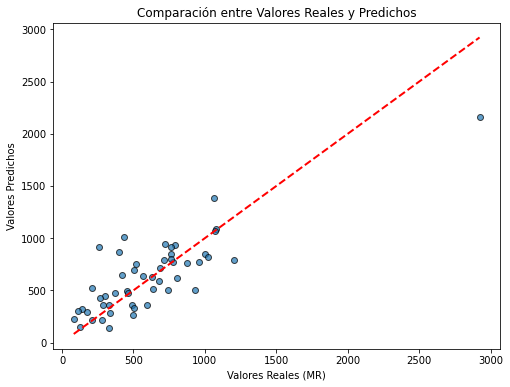

In [3]:
# Definir las características y el objetivo
caracteristicas = df1.loc[:, ['M', 'W', 'H', 'P', 'S']] # Variables predictoras
objetivo = df1.loc[:, 'VR'] # Variable de respuesta

# Crear una tubería para el preprocesamiento y el modelo
modelo = Pipeline([
    ('normalizador', StandardScaler()),
    ('red_neuronal', MLPRegressor(max_iter=10000))
])

# Especificar el conjunto de hiperparámetros para la búsqueda
hiperparametros = {
    'red_neuronal__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'red_neuronal__activation': ['relu', 'tanh'],
    'red_neuronal__solver': ['adam', 'sgd'],
    'red_neuronal__alpha': [0.0001, 0.001, 0.01],
    'red_neuronal__learning_rate': ['constant', 'adaptive']
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
busqueda = GridSearchCV(modelo, hiperparametros, cv=5, scoring='neg_mean_squared_error')
busqueda.fit(caracteristicas, objetivo)

# Seleccionar el mejor modelo encontrado por la búsqueda de hiperparámetros
mejor_modelo = busqueda.best_estimator_

# Generar predicciones utilizando validación cruzada
predicciones = cross_val_predict(mejor_modelo, caracteristicas, objetivo, cv=5)

# Calcular las métricas de rendimiento
error_cuadratico_medio = mean_squared_error(objetivo, predicciones)
error_absoluto_medio = mean_absolute_error(objetivo, predicciones)
coeficiente_determinacion = r2_score(objetivo, predicciones)

# Mostrar los resultados
print("Mejores hiperparámetros encontrados:", busqueda.best_params_)
print("Error Cuadrático Medio (MSE):", error_cuadratico_medio)
print("Error Absoluto Medio (MAE):", error_absoluto_medio)
print("Coeficiente de Determinación (R²):", coeficiente_determinacion)

# Visualizar la relación entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(objetivo, predicciones, edgecolor='k', alpha=0.7)
plt.plot([objetivo.min(), objetivo.max()], [objetivo.min(), objetivo.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (MR)')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos')
plt.show()

**A.**¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?

No diría que es realmente efectivo ya que los errores son grandes y el coeficiente de determinación no es tan alto como para decir que es efectivo. Sin embargo tampoco esta tan mal, si da una noción de los datos. Al ser $R^2$ de 0.69 pudiera considerarse un bueno modelo pero no lo suficiente para etiquetarlo como efectivo.

**B.**¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?

Pensaría que no habría mucha diferencia entre el modelado, pero tengo la idea de que con el modelo lineal tomaría menos tiempo computacional

### EJERCICIO 2

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). 

Al igual que en el ejercicio anterior, los datos se cargan con la función *loadtxt de numpy* (https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html). 

A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. 
El archivo de datos con el que trabajarás depende de tu matrícula.

Para este conjunto de datos:

**1.** Evalúa un modelo perceptrón multicapa con validación cruzada utilizando al menos 5 capas de 20 neuronas.

**2.** Evalúa un modelo perceptrón multicapa con validación cruzada, pero encontrando el número óptimo de capas y neuronas de la red.

**3.** Prepara el modelo perceptrón multicapa:

**A.** Opten los hiperparámetros óptimos de capas y neuronas de la red.

**B.** Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.


**4.** Contesta lo siguientes:

**A.** ¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.

**B.** ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?

In [91]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [95]:
#df2 = pd.read_csv('M_3.txt', sep='\t', header=None)
df2=np.loadtxt('M_3.txt')
#X = df2.iloc[:, 2:-1]
X = df2[:,2:]
#y = df2.iloc[:, 0]
y = df2[:,0]

In [79]:
# EVALUACION DE PERCEPTRON MULTICAPA

# Modelo MLP con 6 capas ocultas de 15 neuronas cada una
modelo_mlp = MLPClassifier(hidden_layer_sizes=[15] * 6, max_iter=1000, random_state=42)

# Escalado de las características
pipeline = make_pipeline(StandardScaler(), modelo_mlp)

# Cross validation para evaluar el rendimiento del modelo
resultado_validacion = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Mostrar la exactitud promedio
print(f'Exactitud promedio: {resultado_validacion.mean()}')


Exactitud promedio: 0.9015873015873016


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# Crear el pipeline con el escalador y el modelo
pipeline = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, random_state=42))

# Rango de hiperparámetros a buscar
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [
        (10, 10, 10, 10, 10, 10),  # 6 capas de 10 neuronas
        (20, 20, 20, 20, 20, 20),  # 6 capas de 20 neuronas
        (20, 20, 20, 20, 20),      # 5 capas de 20 neuronas
        (30, 30, 30, 30, 30),      # 5 capas de 30 neuronas
        (60, 60, 60),              # 3 capas de 60 neuronas
        (80, 80, 80),              # 3 capas de 80 neuronas
        (80, 80),                  # 2 capas de 80 neuronas
        (100, 100),                # 2 capas de 100 neuronas
        (100,)                     # 1 capa de 100 neuronas
    ]
}

# Crear la búsqueda de hiperparámetros
#grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X, y)

print(f'Mejor configuración de capas y neuronas: {grid_search.best_params_}')

Mejor configuración de capas y neuronas: {'mlpclassifier__hidden_layer_sizes': (100,)}


In [96]:
x = X

features = x.shape[1]
features
num_classes = 7
y = to_categorical(y - 1, num_classes=num_classes)  # Restar 1 si las clases están en el rango [1, 7]

# Definir el número de características
features = x.shape[1]

n_folds = 5
kfold = KFold(n_splits=n_folds, shuffle=True)
cv_y_test = []
cv_y_pred = []
it = 0

for train_index, test_index in kfold.split(x, y):
    it += 1
    print("it: ", it)
    
    x_train = x[train_index, :]
    y_train = y[train_index]
    
    x_test = x[test_index, :]
    y_test = y[test_index]
    
    # Fase de entrenamiento
    # Definir el modelo MLP
    mlp_model = Sequential()
    mlp_model.add(Dense(20, activation='relu', input_dim=features))
    mlp_model.add(Dense(20, activation='relu'))
    mlp_model.add(Dense(20, activation='relu'))
    mlp_model.add(Dense(20, activation='relu'))
    mlp_model.add(Dense(20, activation='relu'))
    mlp_model.add(Dense(num_classes, activation='softmax'))  # Capa de salida
    
    # Compilar el modelo
    mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Entrenar el modelo
    mlp_model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)
    
    # Predecir en los datos de prueba
    y_pred_proba = mlp_model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    
    # Agregar los valores verdaderos y predicciones
    cv_y_test.append(y_test_labels)
    cv_y_pred.append(y_pred)

# Convertir listas de arrays a un solo array para la evaluación final
cv_y_test = np.concatenate(cv_y_test)
cv_y_pred = np.concatenate(cv_y_pred)

# Imprimir el reporte de clasificación
print(classification_report(cv_y_test, cv_y_pred))

it:  1
4/4 [==============================] - 0s 513us/step
it:  2
4/4 [==============================] - 0s 6ms/step
it:  3
4/4 [==============================] - 0s 0s/step
it:  4
4/4 [==============================] - 0s 0s/step
it:  5
4/4 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.97      0.94      0.96        90
           2       0.95      0.93      0.94        90
           3       0.99      1.00      0.99        90
           4       0.99      0.98      0.98        90
           5       0.92      0.90      0.91        90
           6       0.94      0.99      0.96        90

    accuracy                           0.96       630
   macro avg       0.96      0.96      0.96       630
weighted avg       0.96      0.96      0.96       630



In [101]:
# 2. EVALUACIÓN DE PERCEPTRÓN MULTICAPA encontrando el num óptimo de capas y neuronas

x=df2[:,2:]
y=df2[:,0]

x = MinMaxScaler().fit_transform(x)
features = x.shape[1]
num_classes = 7
y = to_categorical(y - 1, num_classes=num_classes)

# Configuraciones de capas para el MLP
configuraciones_capas = [
    [50, 20],               # 2 capas con diferente número de neuronas
    [20, 20, 20, 20, 20],   # 5 capas con 20 neuronas en cada una
    [40, 10, 20],           # 3 capas con diferente número de neuronas
    [30, 30, 30, 30]        # 4 capas con 25 neuronas en cada una
]

n_folds = 5
best_config = None
best_accuracy = 0

for config in configuraciones_capas:
    print(f"Evaluando configuración: {config}")
    cv_y_test = []
    cv_y_pred = []
    
    kfold = KFold(n_splits=n_folds, shuffle=True)
    
    for train_index, test_index in kfold.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        x_test = x[test_index, :]
        y_test = y[test_index]
        
        # Fase de entrenamiento
        # Definir el modelo MLP
        mlp_model = Sequential()
        mlp_model.add(Dense(config[0], activation='relu', input_dim=features))
        
        for units in config[1:]:
            mlp_model.add(Dense(units, activation='relu'))
        
        mlp_model.add(Dense(num_classes, activation='softmax'))  # Capa de salida
        
        # Compilar el modelo
        mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Entrenar el modelo
        mlp_model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)
        
        # Predecir en los datos de prueba
        y_pred_proba = mlp_model.predict(x_test)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)
        
        # Agregar los valores verdaderos y predicciones
        cv_y_test.append(y_test_labels)
        cv_y_pred.append(y_pred)

    # Convertir listas de arrays a un solo array para la evaluación final
    cv_y_test = np.concatenate(cv_y_test)
    cv_y_pred = np.concatenate(cv_y_pred)
    
    # Evaluar el rendimiento
    accuracy = np.mean(cv_y_pred == cv_y_test)
    print(f"Precisión para configuración {config}: {accuracy}")

    # Guardar la mejor configuración
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_config = config

print(f"La mejor configuración es {best_config} con una precisión de {best_accuracy}")

Evaluando configuración: [50, 20]
4/4 [==============================] - 0s 6ms/step
Precisión para configuración [50, 20]: 0.9666666666666667
Evaluando configuración: [20, 20, 20, 20, 20]
4/4 [==============================] - 0s 1ms/step
Precisión para configuración [20, 20, 20, 20, 20]: 0.9380952380952381
Evaluando configuración: [40, 10, 20]
4/4 [==============================] - 0s 5ms/step
Precisión para configuración [40, 10, 20]: 0.9587301587301588
Evaluando configuración: [30, 30, 30, 30]
4/4 [==============================] - 0s 2ms/step
Precisión para configuración [30, 30, 30, 30]: 0.9619047619047619
La mejor configuración es [50, 20] con una precisión de 0.9666666666666667


In [102]:
# 3. PERCEPTRON MULTICAPA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report
import numpy as np


# Crear el modelo MLP
mlp_model = Sequential()
mlp_model.add(Dense(units=best_config[0], activation='relu', input_shape=(x_train.shape[1],)))

# Agregar capas adicionales según la mejor configuración
for units in best_config[1:]:
    mlp_model.add(Dense(units=units, activation='relu'))

# Capa de salida
mlp_model.add(Dense(units=num_classes, activation='softmax'))

# Compilar el modelo con un optimizador diferente y una función de pérdida adecuada
mlp_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
mlp_model.fit(x_train, y_train, epochs=300, batch_size=64, verbose=1)  # Cambié los valores de épocas y tamaño de lote

# Predecir en los datos de entrenamiento
Y_pred_proba = mlp_model.predict(x_train)
Y_pred = np.argmax(Y_pred_proba, axis=1)
Y_true = np.argmax(y_train, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(Y_true, Y_pred))


Epoch 1/300
8/8 [==============================] - 0s 2ms/step - loss: 1.9868 - accuracy: 0.1687
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 1.8026 - accuracy: 0.2520
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 1.6035 - accuracy: 0.4881
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 1.5367 - accuracy: 0.5060
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 1.3768 - accuracy: 0.5873
Epoch 6/300
8/8 [==============================] - 0s 1ms/step - loss: 1.2870 - accuracy: 0.5794
Epoch 7/300
8/8 [==============================] - 0s 0s/step - loss: 1.1963 - accuracy: 0.6667
Epoch 8/300
8/8 [==============================] - 0s 208us/step - loss: 1.0669 - accuracy: 0.7421
Epoch 9/300
8/8 [==============================] - 0s 8ms/step - loss: 1.0557 - accuracy: 0.6310
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9682 - accuracy: 0.7123
Epoch 11/300
8/8 [==========

**4.** Contesta lo siguientes:

**A.** ¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? 

En efecto, hay una mejora significativa después de optimizar el tamaño de la red neuronal. Con 4 capas de 30 neuronas se obtuvo una presición de 0.9619. Al evaluar con la mejor configuración [50, 20] tenemos una presición del 0.966666.

**B.** ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?

Mayor tiempo computacional, mayor probabilidad de sobreajuste y que cambian los valores de los hiperparámetros

### EJERCICIO 3

Se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función loadtxt de numpy (https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html). 

La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

Para tu conjunto de datos:

**1.** Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico, y evalúalo con validación cruzada. Para esta caso, es necesario que encuentres la gráfica de Época Vs Exactitud.

**2.** Repite el paso anterior, pero utilizando descenso de gradiente de lote y de mini-lote para entrenar el modelo.

**3.** Evalúa un modelo perceptrón multicapa con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch.

**4.** ¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import SGD 

In [53]:
df3 = pd.read_csv('P1_5.txt', sep='\t', header=None)
df3.shape

(1970, 156)

In [54]:
df3.head(5)

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,1,0,6.778645,5.554810,4.935933,5.639114,6.603463,6.309278,4.738829,3.110043,...,-0.609716,-0.822197,-0.109120,0.899585,1.374105,1.187913,0.742605,0.347446,0.131211,NaN
1,1,1,-0.354725,-0.210143,-0.337065,-0.613978,-0.725109,-0.509282,-0.154146,0.062651,...,-0.052648,0.544180,0.781654,0.833143,1.253793,1.914558,2.013101,1.287430,0.521264,NaN
2,1,1,1.727716,2.056163,1.876898,0.992565,0.224456,0.429907,1.229387,1.403841,...,-0.827163,0.208835,1.473647,1.545710,0.672175,0.097850,0.288585,0.679454,0.822155,NaN
3,1,1,1.064721,1.299112,0.705400,0.422355,1.269587,2.672225,3.240471,2.234018,...,-0.726883,-0.768780,-0.600054,-0.948638,-1.688718,-1.858080,-0.862087,0.660512,1.426284,NaN
4,1,1,-0.010284,-0.097968,-0.345274,-0.216691,0.351261,0.781839,0.695825,0.298840,...,0.730151,-0.396311,-0.324040,0.629645,1.199808,0.600917,-0.806892,-2.087005,-2.579933,NaN


In [56]:
# Separar la variable objetivo y las características
y = df3.iloc[:, 0]
X = df3.iloc[:, 2:-1]

# Aplanar las características si es necesario
if len(caracteristicas.shape) == 3:
    n_samples, timesteps, n_features = caracteristicas.shape
    caracteristicas = caracteristicas.reshape(n_samples, timesteps * n_features)

# Contar las instancias para cada etiqueta
cantidad_etiqueta_1 = objetivo.value_counts().get(1, 0)
cantidad_etiqueta_2 = objetivo.value_counts().get(2, 0)

print("Cantidad de datos con etiqueta 1:", cantidad_etiqueta_1)
print("Cantidad de datos con etiqueta 2:", cantidad_etiqueta_2)

Cantidad de datos con etiqueta 1: 281
Cantidad de datos con etiqueta 2: 1689


**1.** Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico, y evalúalo con validación cruzada. Para esta caso, es necesario que encuentres la gráfica de Época Vs Exactitud.

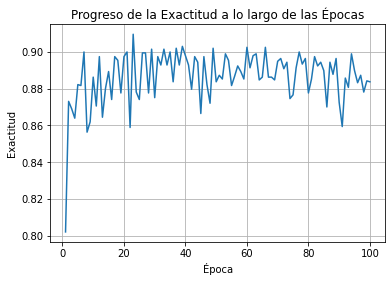

In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold

# Definir el modelo de Perceptrón con SGD (una sola neurona)
modelo_sgd = SGDClassifier(loss='perceptron', max_iter=1, tol=None, random_state=42, learning_rate='constant', eta0=0.01)

# Crear una tubería que incluya la normalización de los datos
modelo_completo = make_pipeline(StandardScaler(), modelo_sgd)

# Especificar el número de épocas y preparar para almacenar las exactitudes
epocas = 100
exactitudes = []

# Configurar la validación cruzada estratificada
validacion_cruzada = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Entrenar y evaluar el modelo en cada época
for epoca in range(1, epocas + 1):
    modelo_completo.named_steps['sgdclassifier'].max_iter = epoca
    puntajes = cross_val_score(modelo_completo, caracteristicas, objetivo, cv=validacion_cruzada, scoring='accuracy', n_jobs=-1)
    exactitudes.append(puntajes.mean())

# Graficar el progreso de la exactitud a lo largo de las épocas
plt.plot(range(1, epocas + 1), exactitudes)
plt.title('Progreso de la Exactitud a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.grid(True)
plt.show()


**2.** Repite el paso anterior, pero utilizando descenso de gradiente de lote y de mini-lote para entrenar el modelo.

In [58]:
from sklearn.metrics import accuracy_score

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configuración para la validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Función para crear el modelo de perceptrón
def create_perceptron_model(learning_rate, batch_size):
    model = Sequential()
    model.add(Dense(1, input_dim=X_scaled.shape[1], activation='relu'))
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Evaluar el modelo con validación cruzada
def evaluate_model(X, y, learning_rate, batch_size):
    accuracies = []

    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Crear y entrenar el modelo
        model = create_perceptron_model(learning_rate, batch_size)
        model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0)

        # Evaluar el modelo
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return np.mean(accuracies)

# Evaluar con descenso de gradiente en lote
batch_size = X_scaled.shape[0]
print("Evaluación con descenso de gradiente en lote:")
accuracy_batch = evaluate_model(X_scaled, y, learning_rate=0.001, batch_size=batch_size)
print(f"Exactitud media: {accuracy_batch:.4f}")

# Evaluar con descenso de gradiente en mini-lote
print("\nEvaluación con descenso de gradiente en mini-lote:")
accuracy_mini_batch = evaluate_model(X_scaled, y, learning_rate=0.001, batch_size=10)
print(f"Exactitud media: {accuracy_mini_batch:.4f}")

Evaluación con descenso de gradiente en lote:
13/13 [==============================] - 0s 0s/step
Exactitud media: 0.0604

Evaluación con descenso de gradiente en mini-lote:
13/13 [==============================] - 0s 0s/step
Exactitud media: 0.0959


#### **3.** Evalúa un modelo perceptrón multicapa con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch.

In [59]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(caracteristicas)

# Configuración para la validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el modelo MLP
model = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, X_scaled, objetivo, cv=skf, scoring='accuracy')

# Resultados
print("Exactitud media con validación cruzada: {:.4f}".format(np.mean(scores)))

Exactitud media con validación cruzada: 0.9020


**4.** ¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?

Relativamente si es suficiente, sin embargo es mucho mejor mientras más capas tenga ya que incrementa la exactitud media conforme se va haciendo cada vez más complejo.